In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('tilapia_growth_final.csv')
df

,fish_size_category,protein_level_percent,feed_type,feeding_rate_percent,feeding_frequency_per_day,water_temperature_c,feeding_method,pellet_size_mm,pellet_hardness,natural_feeding_habit,stock_density_fish_per_m3,dissolved_oxygen_mgL,growth_efficiency
0,Juvenile_0.5_10g,39.8,Crumbles,6.6,4,28.7,Hand_Feeding,1.1,Soft,Plankton_Feeder,48.8,7.2,Good
1,Juvenile_0.5_10g,36.5,Crumbles,7.9,4,30.5,Hand_Feeding,0.9,Soft,Plankton_Feeder,11.9,7.9,Poor
2,Juvenile_10_35g,31.9,Juvenile_Pellet,13.6,3,26.7,Feeding_Bag,2.0,Soft,Omnivorous,48.6,7.0,Poor
3,Adult_35g_plus,27.2,Adult_Pellet,2.1,3,32.8,Hand_Feeding,3.2,Soft,Omnivorous,17.3,6.8,Good
4,Juvenile_10_35g,30.2,Juvenile_Pellet,9.0,4,28.4,Hand_Feeding,1.9,Soft,Omnivorous,17.8,3.2,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,Adult_35g_plus,26.7,Adult_Pellet,2.8,3,24.8,Feeding_Bag,2.7,Soft,Omnivorous,33.2,6.2,Good
291,Adult_35g_plus,26.4,Adult_Pellet,2.7,4,33.0,Feeding_Bag,3.0,Medium,Omnivorous,44.7,6.6,Poor
292,Juvenile_10_35g,30.7,Crumbles,14.6,2,31.9,Hand_Feeding,1.0,Soft,Omnivorous,47.6,6.2,Poor
293,Juvenile_0.5_10g,38.5,Mash_Powder,11.0,3,22.6,Hand_Feeding,0.1,Soft,Plankton_Feeder,41.1,7.1,Poor


In [3]:
mappings = {
    'fish_size_category': {
        'Fry_Larvae': 0,
        'Juvenile_0.5_10g': 1,
        'Juvenile_10_35g': 2,
        'Adult_35g_plus': 3,
        'Broodstock': 4
    },
    'feed_type': {
        'Mash_Powder': 0,
        'Crumbles': 1,
        'Juvenile_Pellet': 2,
        'Adult_Pellet': 3
    },
    'feeding_method': {
        'Hand_Feeding': 0,
        'Feeding_Bag': 1
    },
    'pellet_hardness': {
        'Soft': 0,
        'Medium': 1,
        'Hard': 2
    },
    'natural_feeding_habit': {
        'Plankton_Feeder': 0,
        'Omnivorous': 1
    },
}

for column, mapping in mappings.items():
    if column in df.columns:
        df[column] = df[column].map(mapping)

In [4]:
df

,fish_size_category,protein_level_percent,feed_type,feeding_rate_percent,feeding_frequency_per_day,water_temperature_c,feeding_method,pellet_size_mm,pellet_hardness,natural_feeding_habit,stock_density_fish_per_m3,dissolved_oxygen_mgL,growth_efficiency
0,1,39.8,1,6.6,4,28.7,0,1.1,0,0,48.8,7.2,Good
1,1,36.5,1,7.9,4,30.5,0,0.9,0,0,11.9,7.9,Poor
2,2,31.9,2,13.6,3,26.7,1,2.0,0,1,48.6,7.0,Poor
3,3,27.2,3,2.1,3,32.8,0,3.2,0,1,17.3,6.8,Good
4,2,30.2,2,9.0,4,28.4,0,1.9,0,1,17.8,3.2,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,3,26.7,3,2.8,3,24.8,1,2.7,0,1,33.2,6.2,Good
291,3,26.4,3,2.7,4,33.0,1,3.0,1,1,44.7,6.6,Poor
292,2,30.7,1,14.6,2,31.9,0,1.0,0,1,47.6,6.2,Poor
293,1,38.5,0,11.0,3,22.6,0,0.1,0,0,41.1,7.1,Poor


In [5]:
df['target'] = df['growth_efficiency'].map({'Poor': 0, 'Good': 1})

In [6]:
df

,fish_size_category,protein_level_percent,feed_type,feeding_rate_percent,feeding_frequency_per_day,water_temperature_c,feeding_method,pellet_size_mm,pellet_hardness,natural_feeding_habit,stock_density_fish_per_m3,dissolved_oxygen_mgL,growth_efficiency,target
0,1,39.8,1,6.6,4,28.7,0,1.1,0,0,48.8,7.2,Good,1
1,1,36.5,1,7.9,4,30.5,0,0.9,0,0,11.9,7.9,Poor,0
2,2,31.9,2,13.6,3,26.7,1,2.0,0,1,48.6,7.0,Poor,0
3,3,27.2,3,2.1,3,32.8,0,3.2,0,1,17.3,6.8,Good,1
4,2,30.2,2,9.0,4,28.4,0,1.9,0,1,17.8,3.2,Good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,3,26.7,3,2.8,3,24.8,1,2.7,0,1,33.2,6.2,Good,1
291,3,26.4,3,2.7,4,33.0,1,3.0,1,1,44.7,6.6,Poor,0
292,2,30.7,1,14.6,2,31.9,0,1.0,0,1,47.6,6.2,Poor,0
293,1,38.5,0,11.0,3,22.6,0,0.1,0,0,41.1,7.1,Poor,0


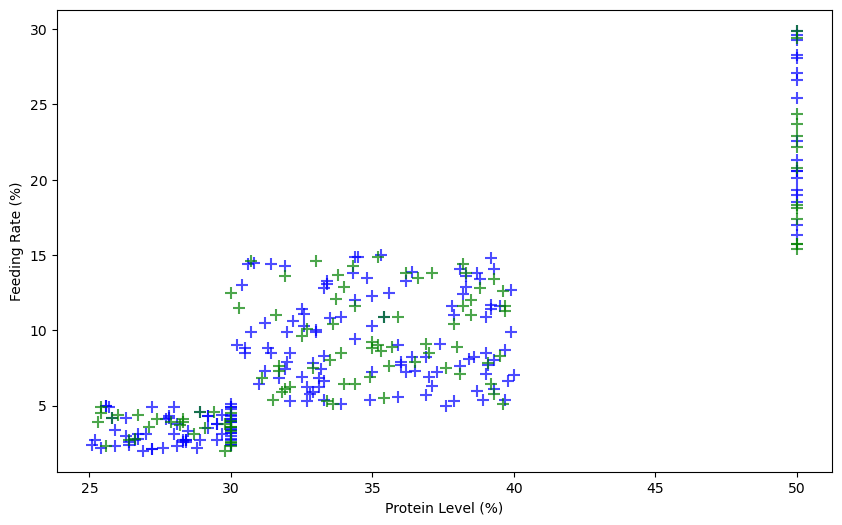

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
df_good = df[df['growth_efficiency'] == 'Good']
df_poor = df[df['growth_efficiency'] == 'Poor']
plt.figure(figsize=(10, 6))
plt.xlabel("Protein Level (%)")
plt.ylabel("Feeding Rate (%)")
plt.scatter(df_good["protein_level_percent"], df_good["feeding_rate_percent"], color="blue", marker="+", s=80, alpha=0.7, label="Good Growth")
plt.scatter(df_poor["protein_level_percent"], df_poor["feeding_rate_percent"], color="green", marker="+", s=80, alpha=0.7, label="Poor Growth")
plt.show()

In [8]:
x = df.drop(['growth_efficiency','target'], axis=1)
y = df['target']

In [9]:
x.head(1)

,fish_size_category,protein_level_percent,feed_type,feeding_rate_percent,feeding_frequency_per_day,water_temperature_c,feeding_method,pellet_size_mm,pellet_hardness,natural_feeding_habit,stock_density_fish_per_m3,dissolved_oxygen_mgL
0,1,39.8,1,6.6,4,28.7,0,1.1,0,0,48.8,7.2


In [10]:
y.head(1)

0    1
Name: target, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
len(x_train)

236

In [21]:
len(x_test)

59

In [22]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1.0)

In [23]:
model.fit(x_train,y_train)

SVC()

In [24]:
# this test data of x_test and compare with y_test and give accuracy score
model.score(x_test,y_test)

0.6949152542372882